# Test BimBamJob - Data Analyst/ Franck MBE

# Importation des bibliotheques 

In [3]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Connexion a la source de données : Extractions

In [7]:
df_action = pd.read_csv ('actions.csv', delimiter=';')
df_applies = pd.read_csv('applies.csv', delimiter=';')

In [10]:
#Affichage des 5 premieres lignes de notre jeu de données Action
df_action.head()

,apply_id,action_id,action_type,created_at
0,796bb847,1af4b0dc,proposed_call,2020-11-09 07:13:10
1,df8f96cb,c6a9393d,proposed_sms,2020-09-28 08:47:36
2,df8f96cb,c82a1841,resume_coaching,2020-10-07 10:09:27
3,fe3df3fa,36e9664d,proposed_call,2020-04-29 03:18:48
4,fe3df3fa,89f1106e,employer_reminder_1,2020-05-08 23:27:19


In [12]:
#Affichage des 5 premieres lignes de notre jeu de données Applies
df_applies.head()

,apply_id,offer_id,candidate_id,status,created_at,updated_at
0,796bb847,709c42b3,c19333cb,refused_employer,2020-11-09 07:06:23,2020-11-25 13:41:03
1,df8f96cb,d6916906,0c036547,interviewed,2020-09-28 08:43:15,2021-03-22 09:06:53
2,fe3df3fa,f7ea7fa8,e75f738a,proposed,2020-04-29 03:14:31,2020-09-23 11:28:13
3,f0f9ca67,08aeecca,6a9c9582,transmited,2020-08-29 05:59:20,2020-12-18 17:22:51
4,19ceec91,01688b78,a8047e7e,proposed,2020-09-17 14:38:17,2020-10-30 20:26:08


In [16]:
# Jointure entre nos deux tables en utilisant la colonne apply_id car il est identifiant de la table Action et clés étrangère dans la table Applies
df = pd.merge(df_action, df_applies, on='apply_id', how='left')

In [18]:
##Affichage des 5 premieres lignes de notre dataset final
df.head(5)

,apply_id,action_id,action_type,created_at_x,offer_id,candidate_id,status,created_at_y,updated_at
0,796bb847,1af4b0dc,proposed_call,2020-11-09 07:13:10,709c42b3,c19333cb,refused_employer,2020-11-09 07:06:23,2020-11-25 13:41:03
1,df8f96cb,c6a9393d,proposed_sms,2020-09-28 08:47:36,d6916906,0c036547,interviewed,2020-09-28 08:43:15,2021-03-22 09:06:53
2,df8f96cb,c82a1841,resume_coaching,2020-10-07 10:09:27,d6916906,0c036547,interviewed,2020-09-28 08:43:15,2021-03-22 09:06:53
3,fe3df3fa,36e9664d,proposed_call,2020-04-29 03:18:48,f7ea7fa8,e75f738a,proposed,2020-04-29 03:14:31,2020-09-23 11:28:13
4,fe3df3fa,89f1106e,employer_reminder_1,2020-05-08 23:27:19,f7ea7fa8,e75f738a,proposed,2020-04-29 03:14:31,2020-09-23 11:28:13


In [20]:
# Renommons les colonnes pour une meilleure visibilité
df.rename(columns={'created_at_x': 'created_at_action', 'created_at_y': 'created_at_applies' }, inplace=True)

In [22]:
#Affichage des colonnes
df.columns

Index(['apply_id', 'action_id', 'action_type', 'created_at_action', 'offer_id',
       'candidate_id', 'status', 'created_at_applies', 'updated_at'],
      dtype='object')

In [24]:
###Affichage des 5 premieres lignes de notre dataset final
df.head(5)

,apply_id,action_id,action_type,created_at_action,offer_id,candidate_id,status,created_at_applies,updated_at
0,796bb847,1af4b0dc,proposed_call,2020-11-09 07:13:10,709c42b3,c19333cb,refused_employer,2020-11-09 07:06:23,2020-11-25 13:41:03
1,df8f96cb,c6a9393d,proposed_sms,2020-09-28 08:47:36,d6916906,0c036547,interviewed,2020-09-28 08:43:15,2021-03-22 09:06:53
2,df8f96cb,c82a1841,resume_coaching,2020-10-07 10:09:27,d6916906,0c036547,interviewed,2020-09-28 08:43:15,2021-03-22 09:06:53
3,fe3df3fa,36e9664d,proposed_call,2020-04-29 03:18:48,f7ea7fa8,e75f738a,proposed,2020-04-29 03:14:31,2020-09-23 11:28:13
4,fe3df3fa,89f1106e,employer_reminder_1,2020-05-08 23:27:19,f7ea7fa8,e75f738a,proposed,2020-04-29 03:14:31,2020-09-23 11:28:13


# Fonction d'affichage pour la visualisation des graphes

In [27]:
def design_viz(df, xlab, ylab, title, label={}):
    fig = px.bar(df, x=xlab, y=ylab, title=f'<b>{title}</b>',labels=label)
    fig.update_layout(title_x=0.5)  # 0.5 means center
    fig.show()

In [29]:
#Profilage sur les differentes types d'actions avec le nonbre d'occurences
request_1 = df.groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False)
request_1

,action_type,Occurences
0,employer_reminder_1,465
6,resume_coaching,350
3,proposed_call,314
4,proposed_email,307
5,proposed_sms,279
1,employer_reminder_2,103
2,interview_coaching,97


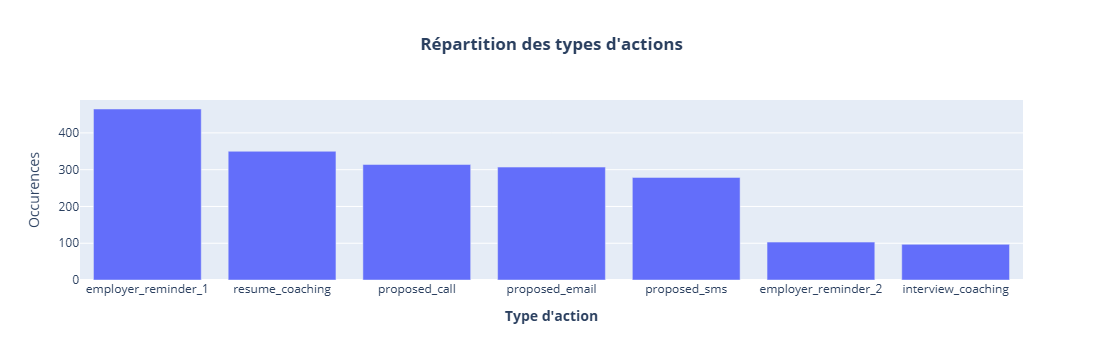

In [35]:
#Visualisation des resultats de la requêtes précédente
design_viz(request_1, xlab='action_type', title='Répartition des types d\'actions', ylab='Occurences', label={'action_type': f'<b>Type d\'action</b>', 'Occurence': f'<b>Occurences</b>'}  )

In [39]:
# Repartition des types d'action en fonction des types d'offres d'emploi
request_2 = df.groupby(['action_type', 'offer_id']).size().reset_index(name='Occurences').sort_values(by='Occurences', ascending=False)
request_2

,action_type,offer_id,Occurences
1317,resume_coaching,12f59940,6
574,proposed_call,12f59940,4
707,proposed_call,99ce7028,4
294,employer_reminder_1,ca3284b4,4
28,employer_reminder_1,12f59940,4
...,...,...,...
567,proposed_call,0ac9db8f,1
566,proposed_call,09f471e5,1
565,proposed_call,08aeecca,1
564,proposed_call,06f1765b,1


In [41]:
#Statistique sur la colonne action_id 
df['action_id'].describe()

count         1915
unique        1915
top       1af4b0dc
freq             1
Name: action_id, dtype: object

In [43]:
# Repartition des top types d'action en fonction des types d'offres d'emploi
df_count = df.groupby(['offer_id', 'action_type']).size().reset_index(name='Occurences')
df_count['rn'] = df_count.groupby('offer_id')['Occurences'].rank(method='first', ascending=False)

df_count

,offer_id,action_type,Occurences,rn
0,0034064b,interview_coaching,1,1.0
1,0034064b,proposed_sms,1,2.0
2,0034064b,resume_coaching,1,3.0
3,0036aa64,employer_reminder_1,1,1.0
4,0036aa64,employer_reminder_2,1,2.0
...,...,...,...,...
1582,fde4e182,proposed_call,1,1.0
1583,fde4e182,resume_coaching,1,2.0
1584,fecf636d,interview_coaching,1,1.0
1585,fecf636d,proposed_email,1,2.0


In [45]:
# Repartition des top types d'action en fonction des candidats
df_count_2 = df.groupby(['candidate_id', 'action_type']).size().reset_index(name='Occurences')
df_count_2['rn'] = df_count_2.groupby('candidate_id')['Occurences'].rank(ascending=False)

df_count_2

,candidate_id,action_type,Occurences,rn
0,0255d702,employer_reminder_1,4,2.5
1,0255d702,interview_coaching,2,5.0
2,0255d702,proposed_call,4,2.5
3,0255d702,proposed_email,4,2.5
4,0255d702,proposed_sms,1,6.0
...,...,...,...,...
606,ffcfb194,interview_coaching,1,5.0
607,ffcfb194,proposed_call,1,5.0
608,ffcfb194,proposed_email,3,1.5
609,ffcfb194,proposed_sms,2,3.0


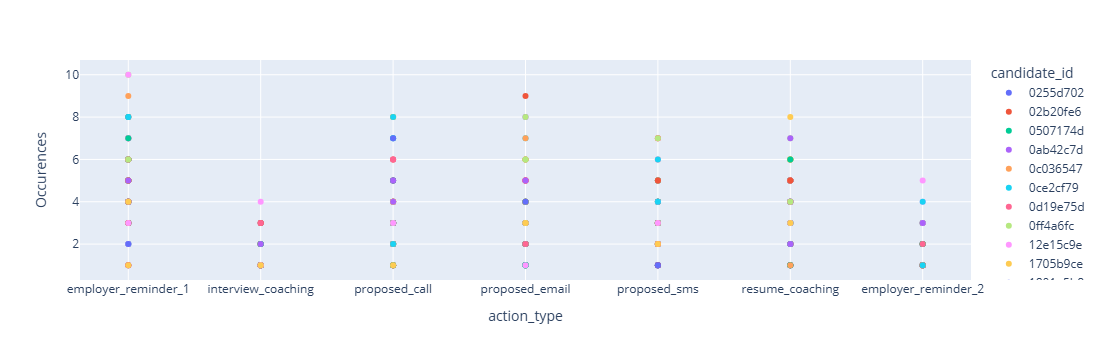

In [47]:
fig = px.scatter(df_count_2, x='action_type', y='Occurences', color="candidate_id")
fig.show()

In [49]:
# Repartition des top types d'action en fonction des status de la demande : Preposed
request_status_proposed = df[df['status'] == 'proposed'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Preposed (Action Type)'})
request_status_proposed

,Preposed (Action Type),Occurences
0,employer_reminder_1,174
6,resume_coaching,142
3,proposed_call,125
5,proposed_sms,118
4,proposed_email,117
1,employer_reminder_2,46
2,interview_coaching,32


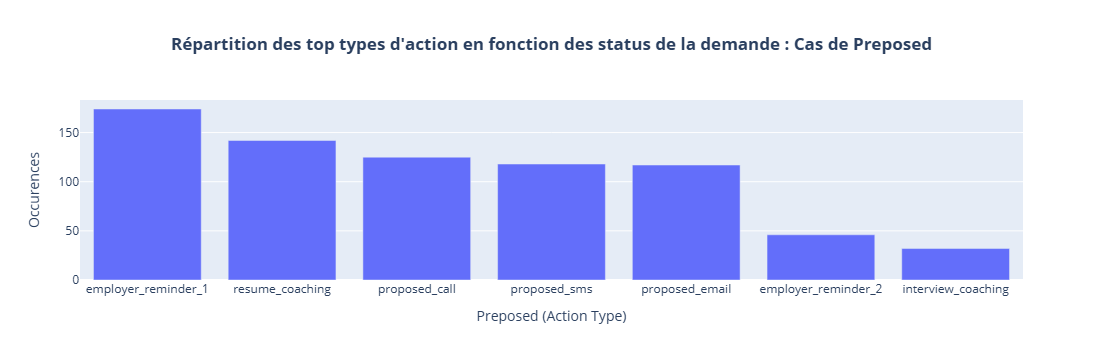

In [51]:
#Graph associé à la requête précédente : Preposed
preposed = design_viz(request_status_proposed, xlab='Preposed (Action Type)', 
           title='Répartition des top types d\'action en fonction des status de la demande : Cas de Preposed', 
           ylab='Occurences', label={'action_type': f'<b>Prepoed (Type d\'action)</b>', 'Occurence': f'<b>Occurences</b>'})
preposed

In [53]:
# Repartition des top types d'action en fonction des status de la demande : transmitted
request_status_transmitted = df[df['status'] == 'transmitted'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Preposed (Action Type)'})
request_status_transmitted

,Preposed (Action Type),Occurences


In [55]:
#Remarque : Aucune demande avec le status transmitted n'a été validé

In [57]:
# Repartition des top types d'action en fonction des status de la demande : interviewed
request_status_interviewed = df[df['status'] == 'interviewed'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Interviewed (Action Type)'})
request_status_interviewed

,Interviewed (Action Type),Occurences
0,employer_reminder_1,83
6,resume_coaching,74
3,proposed_call,60
5,proposed_sms,42
4,proposed_email,36
2,interview_coaching,34
1,employer_reminder_2,12


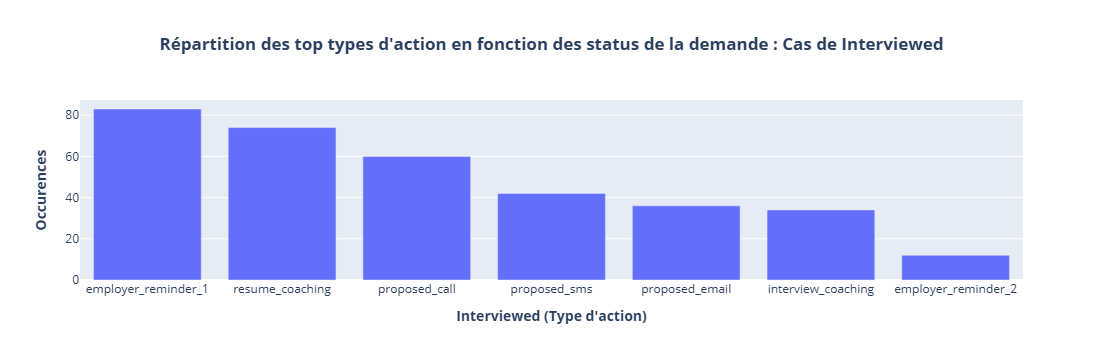

In [59]:
#Graph associé à la requête précédente : interviewed
interviewed = design_viz(request_status_interviewed, xlab='Interviewed (Action Type)', 
           title='Répartition des top types d\'action en fonction des status de la demande : Cas de Interviewed', 
           ylab='Occurences', label={'Interviewed (Action Type)': f'<b>Interviewed (Type d\'action)</b>', 'Occurences': f'<b>Occurences</b>'})
interviewed

In [61]:
# Repartition des top types d'action en fonction des status de la demande : hired
request_status_hired = df[df['status'] == 'hired'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Hired (Action Type)'})
request_status_hired

,Hired (Action Type),Occurences
0,employer_reminder_1,36
6,resume_coaching,34
4,proposed_email,22
5,proposed_sms,18
3,proposed_call,17
2,interview_coaching,15
1,employer_reminder_2,7


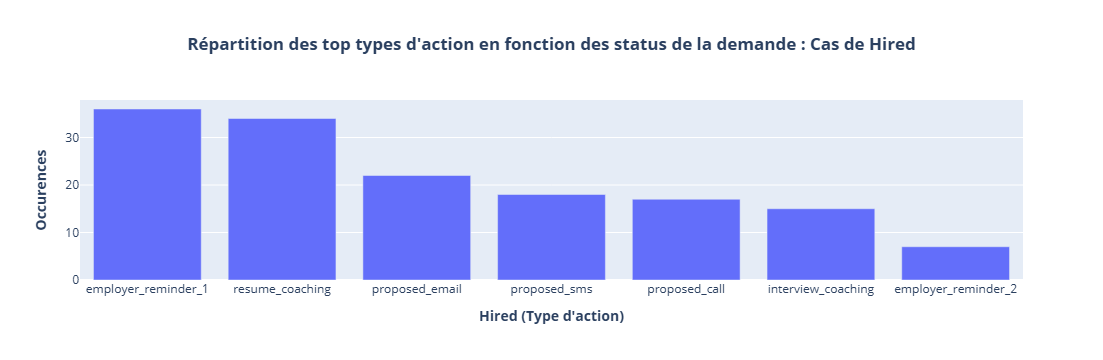

In [63]:
#Graph associé à la requête précédente : hired
hired =design_viz(request_status_hired, xlab='Hired (Action Type)', 
           title='Répartition des top types d\'action en fonction des status de la demande : Cas de Hired', 
           ylab='Occurences', label={'Hired (Action Type)': f'<b>Hired (Type d\'action)</b>', 'Occurences': f'<b>Occurences</b>'})
hired

In [65]:
# Repartition des top types d'action en fonction des status de la demande : refused_candidate
request_status_refused_candidate = df[df['status'] == 'refused_candidate'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Refused Candidate (Action Type)'})
request_status_refused_candidate

,Refused Candidate (Action Type),Occurences
0,employer_reminder_1,26
3,proposed_call,26
4,proposed_email,23
5,proposed_sms,16
6,resume_coaching,14
1,employer_reminder_2,10
2,interview_coaching,1


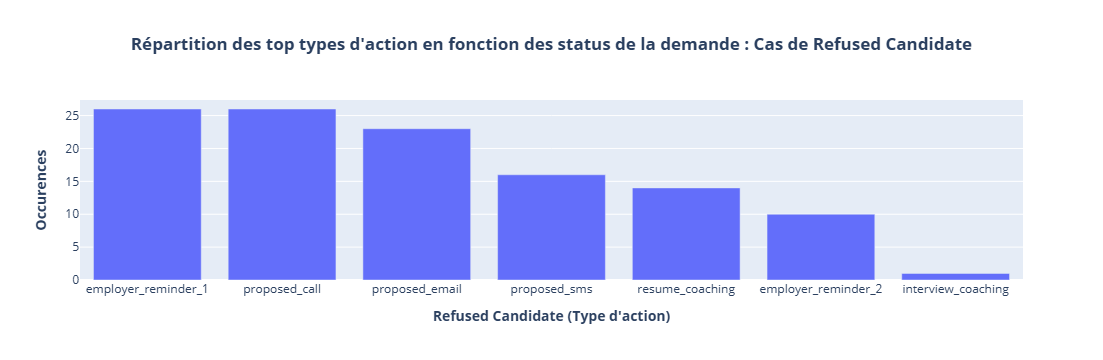

In [67]:
#Graph associé à la requête précédente : refused_candidate
refused_candidate = design_viz(request_status_refused_candidate, xlab='Refused Candidate (Action Type)', 
           title='Répartition des top types d\'action en fonction des status de la demande : Cas de Refused Candidate', 
           ylab='Occurences', label={'Refused Candidate (Action Type)': f'<b>Refused Candidate (Type d\'action)</b>', 'Occurences': f'<b>Occurences</b>'})
refused_candidate

In [69]:
# Repartition des top types d'action en fonction des status de la demande : refused_employer
request_status_refused_employer = df[df['status'] == 'refused_employer'][['action_type']].groupby('action_type').size().reset_index(name="Occurences").sort_values(by='Occurences', ascending=False).rename(columns={'action_type': 'Refused Employer (Action Type)'})
request_status_refused_employer

,Refused Employer (Action Type),Occurences
3,proposed_email,41
0,employer_reminder_1,38
4,proposed_sms,26
2,proposed_call,23
5,resume_coaching,16
1,employer_reminder_2,13


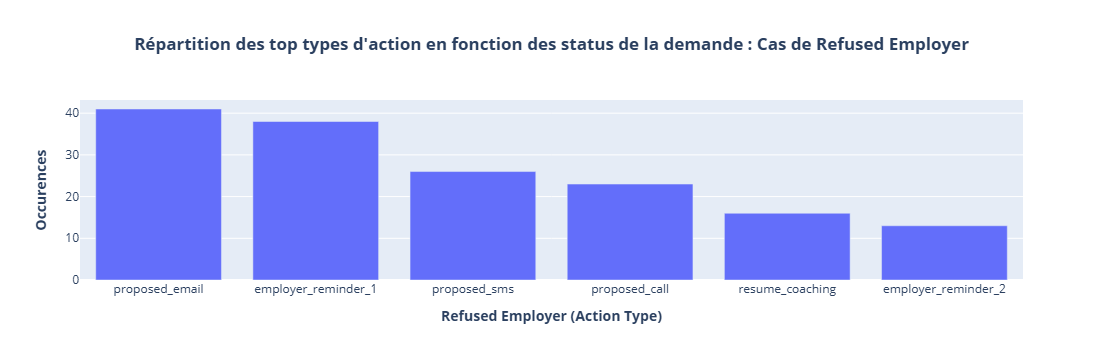

In [71]:
#Graph associé à la requête précédente : refused_employer
refused_employer = design_viz(request_status_refused_employer, xlab='Refused Employer (Action Type)', 
           title='Répartition des top types d\'action en fonction des status de la demande : Cas de Refused Employer', 
           ylab='Occurences', label={'Refused Employer (Action Type)': f'<b>Refused Employer (Action Type)</b>', 'Occurences': f'<b>Occurences</b>'})
refused_employer

In [73]:
#Realisation du dashboard
from plotly.subplots import make_subplots

In [75]:
dashboard = df.groupby(['action_type', 'status']).size().reset_index(name='Occurences').sort_values(by='Occurences', ascending=False)
dashboard.head(2)

,action_type,status,Occurences
2,employer_reminder_1,proposed,174
37,resume_coaching,proposed,142


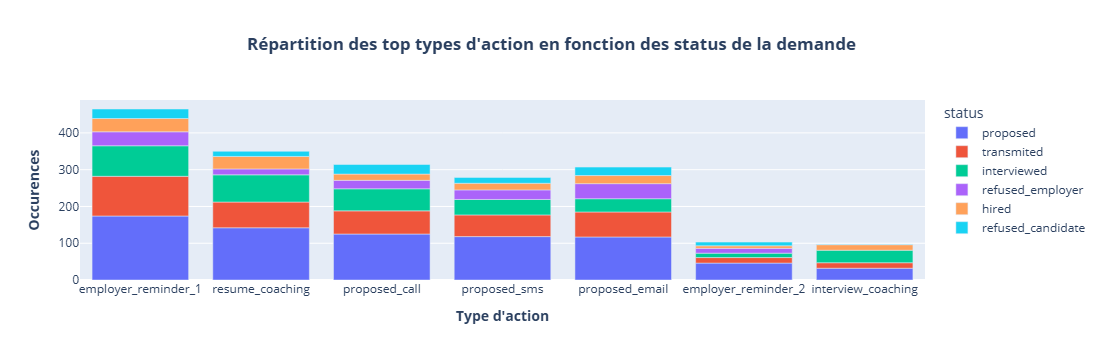

In [79]:
fig = px.bar(dashboard, x='action_type', y='Occurences', 
             title=f'<b>Répartition des top types d\'action en fonction des status de la demande</b>',
             labels={'action_type': f'<b>Type d\'action</b>', 'Occurences': f'<b>Occurences</b>'}, color='status')
fig.update_layout(title_x=0.5)  # 0.5 means center
fig.show()